<IPython.core.display.Javascript object>


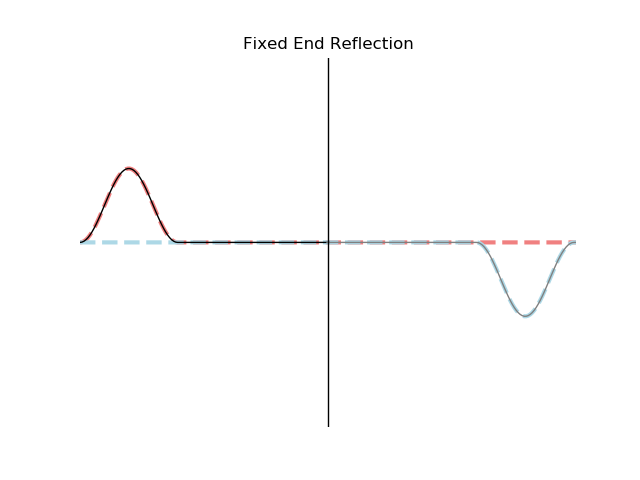

interactive(children=(IntSlider(value=0, description='time', max=199), RadioButtons(description='option', opti…

In [1]:
%matplotlib notebook
from mpl_toolkits.axisartist.axislines import SubplotZero
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 50)
y = np.cos(x*np.pi)+1

x0 = np.linspace(-5, 5, 250)
y0 = np.zeros(len(x0))

fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
lineleft, = ax.plot(x0, y0, linewidth=3, color="lightcoral", linestyle="--")
lineright, = ax.plot(x0, y0, linewidth=3, color="lightblue", linestyle="--")
line, = ax.plot(x0[:126], y0[:126], linewidth=1, color="black")
shadowline, = ax.plot(x0[124:], y0[124:], linewidth=1, color="grey")

ax.axvline(linewidth=1, color="black")
plt.xlim(-5, 5)
plt.ylim(-5, 5)

for direction in ["xzero", "yzero", "left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)
    
def update(time, option):
    y2 = np.zeros(len(x0))
    y3 = np.zeros(len(x0))
    y4 = np.zeros(len(x0))
    
    y2[time:time+50]=y[:]
    lineleft.set_ydata(y2)
    
    if option == "Free End":
        ax.set_title("Free End Reflection")
        y3[199-time:249-time]=y[:]
    else:
        ax.set_title("Fixed End Reflection")
        y3[199-time:249-time]=-y[:]
    lineright.set_ydata(y3)
    
    y4[:]=y2[:] + y3[:]
    line.set_ydata(y4[:126])
    shadowline.set_ydata(y4[124:])
    
    fig.canvas.draw_idle()

interact(update, time = widgets.IntSlider(value=0, min=0, max=199, step=1), option = widgets.RadioButtons(options=["Fixed End", "Free End"]));